### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
The first dimension represents the number of samples (50k for train, 10k for test). The next two dimensions represent the resolution of each sample (32x32 pixels). Finally the last dimension represents the channels used to represent the image, 3 for Red, Green and Blue.

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

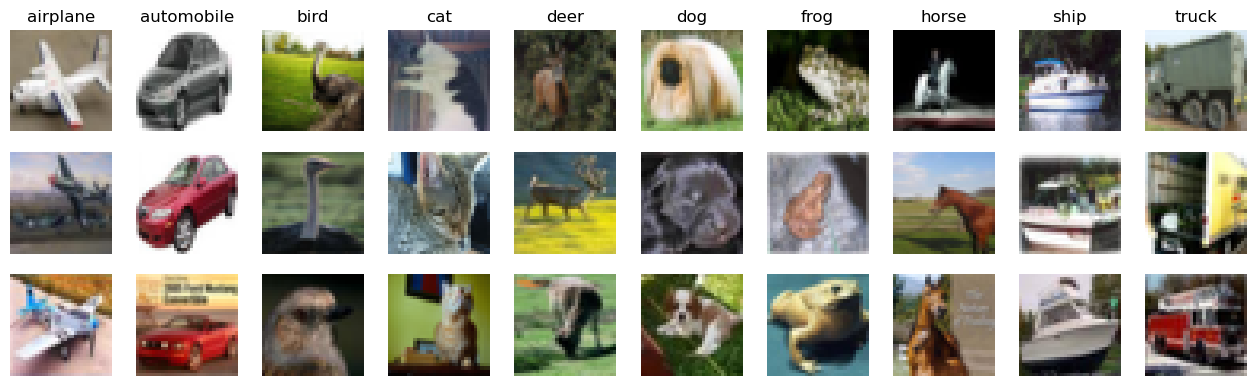

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [46]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Dense(512, activation='tanh')(x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

Model: "model_10"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_12 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 flatten_11 (Flatten)                        (None, 3072)                            0              
                                                                                                    
 dense_34 (Dense)                            (None, 512)                             1573376        
                                                                                                    
 dense_35 (Dense)                            (None, 256)                             131328         
                                                                         

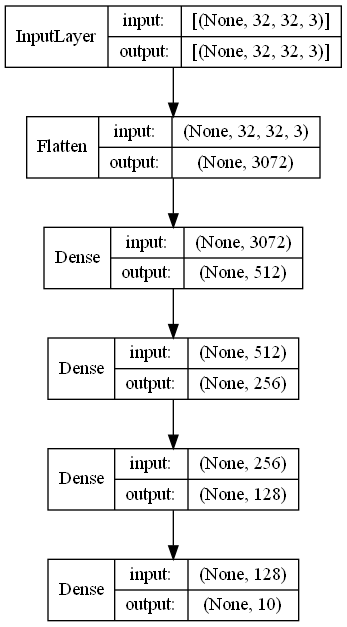

In [47]:
# Print the model
import keras.utils
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [48]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8175 - accuracy: 0.3453 - val_loss: 1.7793 - val_accuracy: 0.3647
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6362 - accuracy: 0.4111 - val_loss: 1.6542 - val_accuracy: 0.4155
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5628 - accuracy: 0.4356 - val_loss: 1.6303 - val_accuracy: 0.4265
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5181 - accuracy: 0.4566 - val_loss: 1.5453 - val_accuracy: 0.4478
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4816 - accuracy: 0.4715 - val_loss: 1.4824 - val_accuracy: 0.4796
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4523 - accuracy: 0.4794 - val_loss: 1.5050 - val_accuracy: 0.4688
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4268 - accuracy: 0.4879 - val_loss: 1.6389 - val_accuracy:

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [49]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.489
Test accuracy = 0.488


313/313 [==============================] - 1s 2ms/step


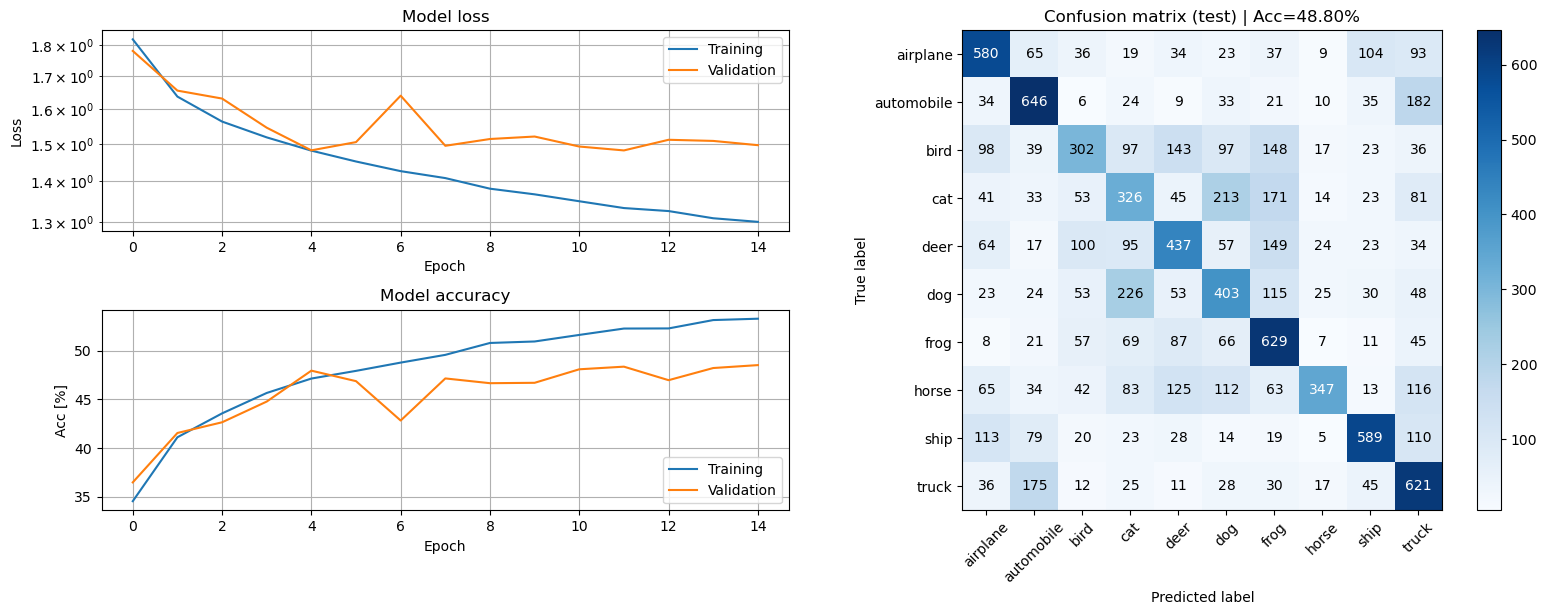

In [50]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
As the images represent objects that are quite complex (and after trials and errors), I choose to have 3 dense layers to give a chance to the model to learn complex features. For the weights, I choose the final layer to have 128 nodes, then the middle one to have double that amount (256), and the first layer to have double that as well (512). Although it looks like the model is learning (performances increasing over time) the performances are quite mediocre, with the model only beeing right about half of the time. It is also using 1.7M parameters, which is relatively a lot for the small size of the model. This shows that dense neural networks are not the most appropriate for image classification. 

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
Although the two datasets have about the same number of samples, each sample in the CIFAR10 dataset have much more information (32x32x3). Moreover, when looking at iamges examples, it can be seen that the objects to be classified are not all oriented in the same direction, sometimes facing right, sometimes facing left, and the variety of each object is much higher (for example, many races of dogs), hence this can explain why it is much harder to classify this dataset. 

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
#Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D((2, 2))(x)
#Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
#Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
# Fully connected layers, similar to the previous model
x = Flatten()(x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_4"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_6 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_3 (Conv2D)                           (None, 32, 32, 32)                      896            
                                                                                                    
 max_pooling2d_3 (MaxPooling2D)              (None, 16, 16, 32)                      0              
                                                                                                    
 conv2d_4 (Conv2D)                           (None, 16, 16, 64)                      18496          
                                                                          

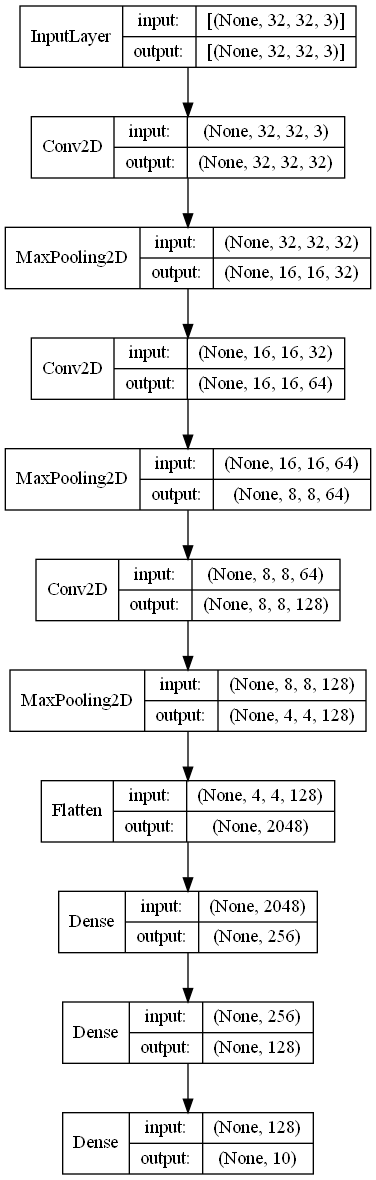

In [22]:
# Print the model
import keras.utils
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

##### **Training the CNN**

In [23]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4855 - accuracy: 0.4622 - val_loss: 1.1776 - val_accuracy: 0.5826
Epoch 2/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0531 - accuracy: 0.6279 - val_loss: 0.9615 - val_accuracy: 0.6655
Epoch 3/15
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8800 - accuracy: 0.6909 - val_loss: 0.9113 - val_accuracy: 0.6888
Epoch 4/15
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7498 - accuracy: 0.7360 - val_loss: 0.8804 - val_accuracy: 0.7014
Epoch 5/15
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6407 - accuracy: 0.7757 - val_loss: 0.8252 - val_accuracy: 0.7218
Epoch 6/15
1250/1250 [==============================] - 14s 11ms/step - loss: 0.5463 - accuracy: 0.8099 - val_loss: 0.8637 - val_accuracy: 0.7156
Epoch 7/15
1250/1250 [==============================] - 14s 11ms/step - loss: 0.4620 - accuracy: 0.8362 - val_loss: 0.8471 -

##### **Evaluating the CNN**

In [24]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.320
Test accuracy = 0.698


313/313 [==============================] - 1s 3ms/step


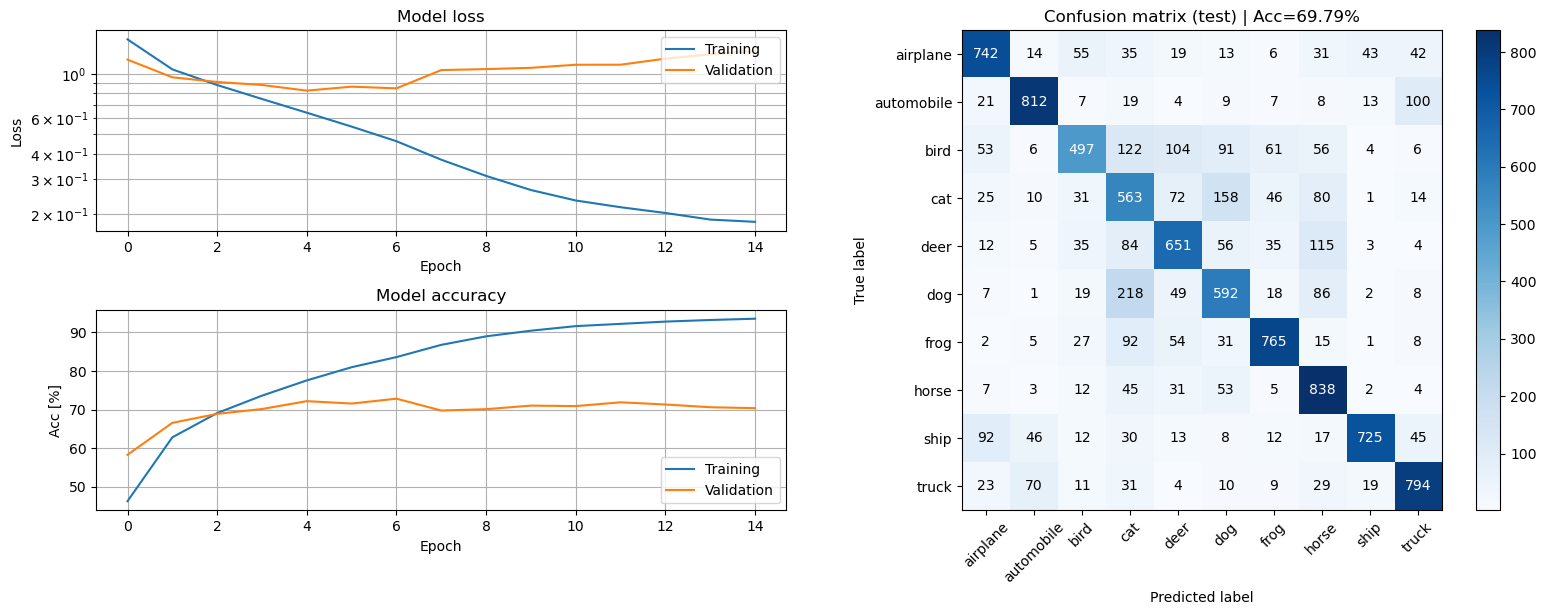

In [25]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
I used 3 blocks of Convolution-Activation-Pooling and for the dense network I reused part of the DNN from the previous question. The performances a much better although it looks like the model quickly goes into overfitting. 

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
This model uses almost a third of the parameters and perform much better. This is because convolution allows for shared weights and also permits to learn features that are not dependant of the location in the image.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [26]:
from tensorflow.keras.layers import Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
#Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
#Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
#Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
# Fully connected layers, similar to the previous model
x = Flatten()(x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_5"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_7 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_6 (Conv2D)                           (None, 32, 32, 32)                      896            
                                                                                                    
 max_pooling2d_6 (MaxPooling2D)              (None, 16, 16, 32)                      0              
                                                                                                    
 dropout (Dropout)                           (None, 16, 16, 32)                      0              
                                                                          

In [27]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6645 - accuracy: 0.3900 - val_loss: 1.3845 - val_accuracy: 0.5024
Epoch 2/15
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2848 - accuracy: 0.5376 - val_loss: 1.1607 - val_accuracy: 0.5843
Epoch 3/15
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1410 - accuracy: 0.5937 - val_loss: 1.0168 - val_accuracy: 0.6400
Epoch 4/15
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0325 - accuracy: 0.6343 - val_loss: 0.9927 - val_accuracy: 0.6580
Epoch 5/15
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9646 - accuracy: 0.6586 - val_loss: 0.8645 - val_accuracy: 0.6984
Epoch 6/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9069 - accuracy: 0.6781 - val_loss: 0.8115 - val_accuracy: 0.7139
Epoch 7/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8625 - accuracy: 0.6945 - val_loss: 0.8503 -

In [28]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.792
Test accuracy = 0.734


313/313 [==============================] - 1s 4ms/step


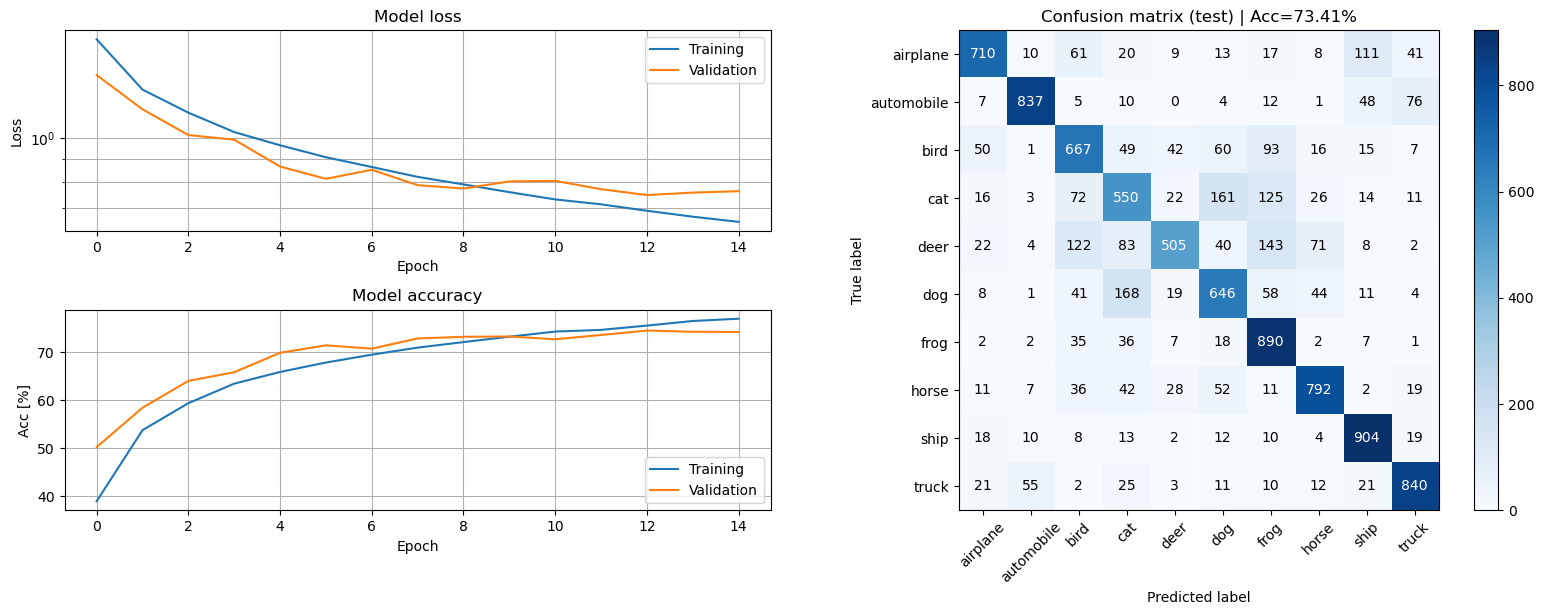

In [29]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
Without dropout layer : training accuracy = 93.58% ; validation accuracy = 70.36% ; test accuracy = 69.79%

Without dropout layer : training accuracy = 76.92% ; validation accuracy = 74.17% ; test accuracy = 73.41%

The training accuracy is much lower in the CNN with dropout layers, but it is much closer to the validationa and test accuracy. Validation and test accuracy are slightly higher in the later CNN as well. This shows that dropout prevent the model from overfitting. At test time, the dropout layer should "deactivate" so that the model can use all the learned parameter to make predictions with an accuracy as close as possible to the generalization accuracy of the model. 

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [32]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
#Block 1
x = Conv2D(32, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

#Block 2
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

#Block 3
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Fully connected layers, similar to the previous model
x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('tanh')(x)

x = Dense(128)(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('tanh')(x)

x = Dense(10, activation='softmax')(x)


# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_7"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_9 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_12 (Conv2D)                          (None, 32, 32, 32)                      896            
                                                                                                    
 batch_normalization_5 (BatchNormalization)  (None, 32, 32, 32)                      128            
                                                                                                    
 activation_5 (Activation)                   (None, 32, 32, 32)                      0              
                                                                          

In [33]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4690 - accuracy: 0.4711 - val_loss: 1.3194 - val_accuracy: 0.5226
Epoch 2/15
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1640 - accuracy: 0.5869 - val_loss: 0.9763 - val_accuracy: 0.6631
Epoch 3/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0284 - accuracy: 0.6363 - val_loss: 0.8994 - val_accuracy: 0.6800
Epoch 4/15
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9451 - accuracy: 0.6685 - val_loss: 0.8357 - val_accuracy: 0.7088
Epoch 5/15
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8854 - accuracy: 0.6906 - val_loss: 0.8152 - val_accuracy: 0.7194
Epoch 6/15
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8429 - accuracy: 0.7043 - val_loss: 0.9006 - val_accuracy: 0.6855
Epoch 7/15
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8017 - accuracy: 0.7207 - val_loss: 0.7706 -

In [34]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.686
Test accuracy = 0.766


313/313 [==============================] - 1s 4ms/step


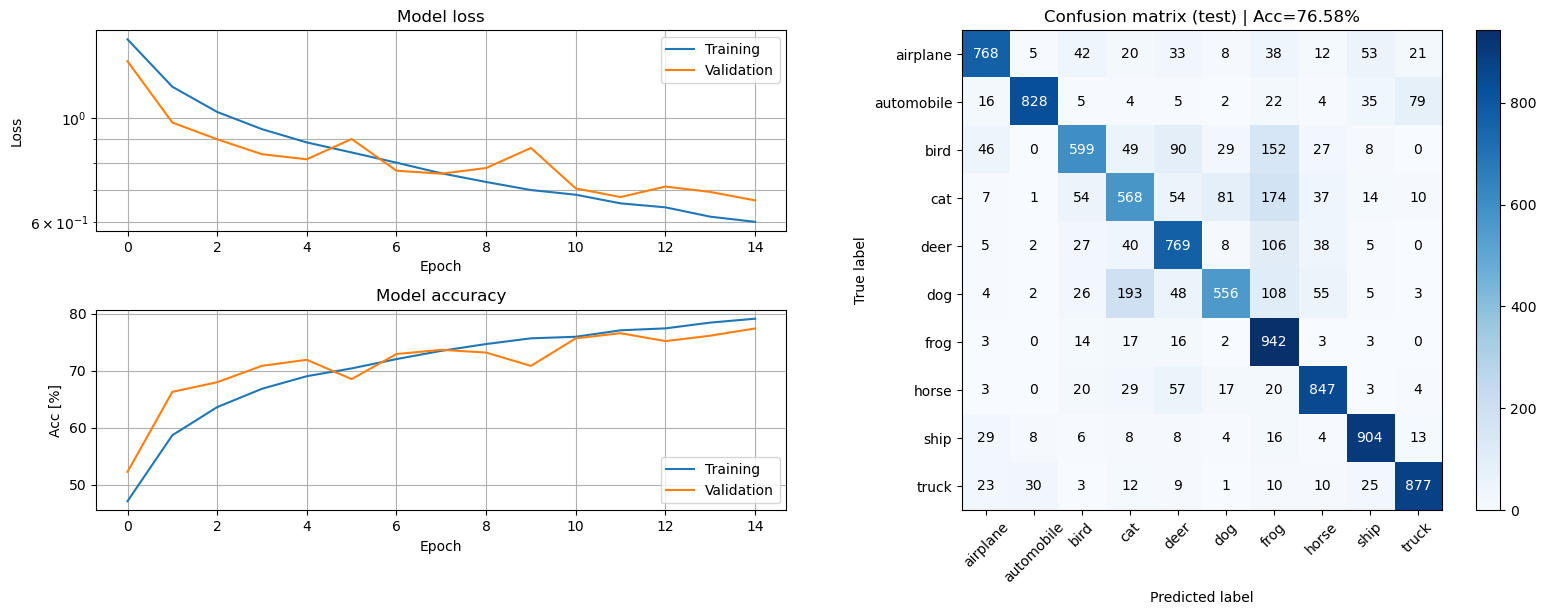

In [35]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
If the minibatch is to small, the BatchNorm statistics is not going to be representative of the overall dataset. It is also going to take longer to train the model. 

If the minibatch is to big, it leads to poor generalization for reasons that are apperently still debated (source : https://wandb.ai/ayush-thakur/dl-question-bank/reports/What-s-the-Optimal-Batch-Size-to-Train-a-Neural-Network---VmlldzoyMDkyNDU , https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_8"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_10 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_15 (Conv2D)                          (None, 32, 32, 32)                      896            
                                                                                                    
 batch_normalization_10 (BatchNormalization)  (None, 32, 32, 32)                     128            
                                                                                                    
 activation_10 (Activation)                  (None, 32, 32, 32)                      0              
                                                                          

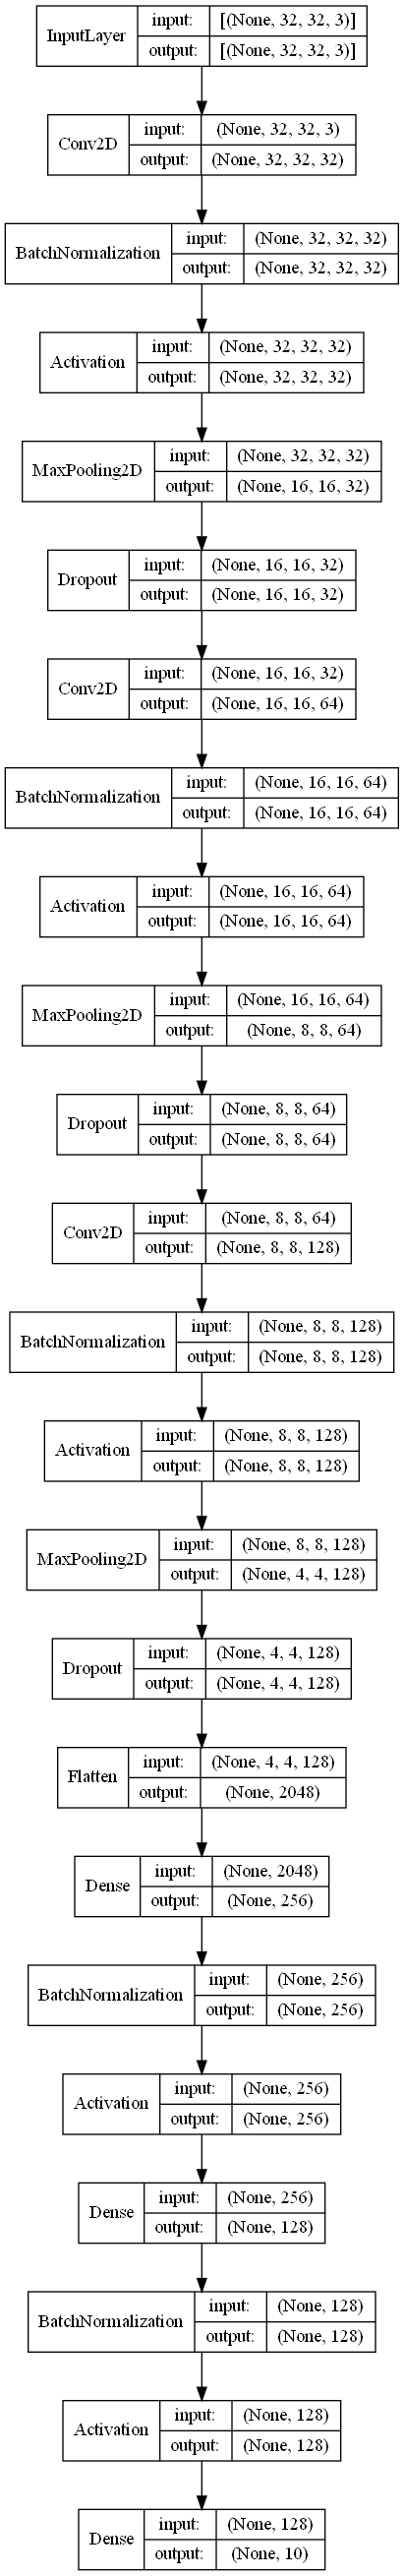

In [36]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

#Block 1
x = Conv2D(32, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

#Block 2
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

#Block 3
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Fully connected layers, similar to the previous model
x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('tanh')(x)

x = Dense(128)(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('tanh')(x)

x = Dense(10, activation='softmax')(x)



# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [38]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 17s 13ms/step - loss: 1.2601 - accuracy: 0.5502 - val_loss: 1.1961 - val_accuracy: 0.5742
Epoch 2/25
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0683 - accuracy: 0.6208 - val_loss: 0.9563 - val_accuracy: 0.6565
Epoch 3/25
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9667 - accuracy: 0.6588 - val_loss: 0.9099 - val_accuracy: 0.6805
Epoch 4/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9019 - accuracy: 0.6850 - val_loss: 0.8190 - val_accuracy: 0.7211
Epoch 5/25
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8559 - accuracy: 0.6993 - val_loss: 0.7721 - val_accuracy: 0.7252
Epoch 6/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8096 - accuracy: 0.7167 - val_loss: 0.8940 - val_accuracy: 0.6883
Epoch 7/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7688 - accuracy: 0.7325 - val_loss: 0.7261 -

In [39]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.658
Test accuracy = 0.784


313/313 [==============================] - 1s 4ms/step


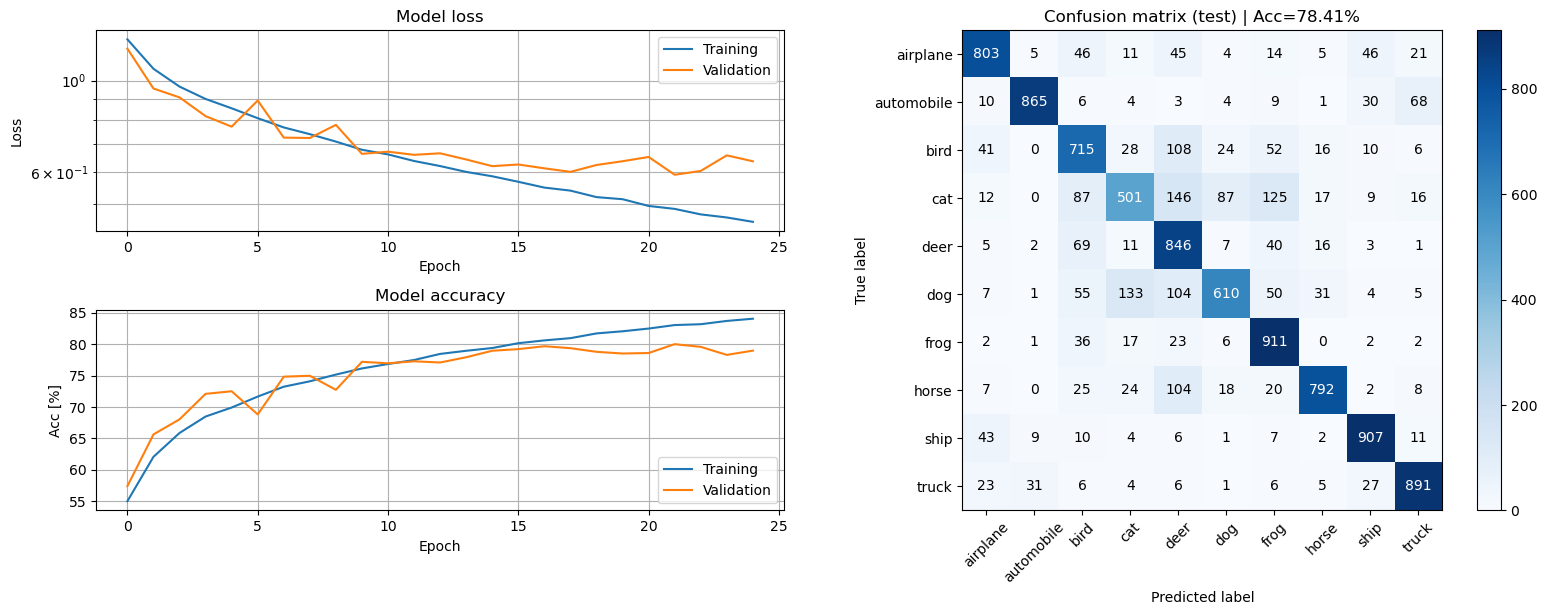

In [40]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
I used the same model as in the previous question as it was already achieving 75% test accuracy after 15 epochs, but I trained it for 25 epochs instead. Is is not performing much better as it starts overfitting after 15 epochs. 

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)